# Analysis on TRAI Dataset
![Image](https://entrackr.com/wp-content/uploads/2018/05/TRAI.jpg)

**TRAI stands for Telecom regulatory Authority of India**
<br>
[Dataset](https://myspeed.trai.gov.in/download/may21_publish.csv)

The Dataset Originally had no headers, but the columns contains:
- Carrier
- Technology
- Type of network usage (Download or Upload)
- Speed
- Area

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./may21_publish.csv", header = None)
df.head()

,0,1,2,3,4,5
0,JIO,4G,upload,58.0,-73,Kerala
1,AIRTEL,4G,upload,249.0,-71,Kerala
2,AIRTEL,4G,upload,4490.0,-69,Kerala
3,AIRTEL,4G,download,17758.0,-81,Kerala
4,AIRTEL,4G,download,14606.0,-81,Kerala


In [3]:
df.shape

(256562, 6)

In [4]:
df.columns = ["Carrier","Technology","Type","Speed","dBm","Area"]
df.head()

,Carrier,Technology,Type,Speed,dBm,Area
0,JIO,4G,upload,58.0,-73,Kerala
1,AIRTEL,4G,upload,249.0,-71,Kerala
2,AIRTEL,4G,upload,4490.0,-69,Kerala
3,AIRTEL,4G,download,17758.0,-81,Kerala
4,AIRTEL,4G,download,14606.0,-81,Kerala


In [5]:
df.drop(df[df['dBm'] == "na"].index, inplace = True)
df.dropna(inplace = True)
df.head(10)

,Carrier,Technology,Type,Speed,dBm,Area
0,JIO,4G,upload,58.0,-73,Kerala
1,AIRTEL,4G,upload,249.0,-71,Kerala
2,AIRTEL,4G,upload,4490.0,-69,Kerala
3,AIRTEL,4G,download,17758.0,-81,Kerala
4,AIRTEL,4G,download,14606.0,-81,Kerala
5,AIRTEL,4G,upload,1356.0,-81,Kerala
6,AIRTEL,4G,upload,1493.0,-81,Kerala
7,JIO,4G,download,29008.0,-85,Delhi
8,JIO,4G,upload,8392.0,-85,Delhi
39,JIO,4G,download,51160.0,-65,Tamil Nadu


In [6]:
df.shape

(204537, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204537 entries, 0 to 256561
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Carrier     204537 non-null  object 
 1   Technology  204537 non-null  object 
 2   Type        204537 non-null  object 
 3   Speed       204537 non-null  float64
 4   dBm         204537 non-null  object 
 5   Area        204537 non-null  object 
dtypes: float64(1), object(5)
memory usage: 10.9+ MB


In [8]:
df["dBm"] = df["dBm"].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204537 entries, 0 to 256561
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Carrier     204537 non-null  object 
 1   Technology  204537 non-null  object 
 2   Type        204537 non-null  object 
 3   Speed       204537 non-null  float64
 4   dBm         204537 non-null  int32  
 5   Area        204537 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 10.1+ MB


### For Adding Geospatial Attributes to the dataframe

In [9]:

#from geopy.exc import GeocoderTimedOut
#from geopy.geocoders import Nominatim
   
# Initialise list of Lat and Long
#longitude = []
#latitude = []
   
# Function to add longitude and latitude to area column
#def findGeocode(area):
#    try:
#        geolocator = Nominatim(user_agent="your_app_name")
#        return geolocator.geocode(area)
#    except GeocoderTimedOut:
#        return findGeocode(area)    
  
# Iterate over area
#for region in (df["Area"]):
      
#    if findGeocode(region) != None:
           
#        loc = findGeocode(region)
          
#        latitude.append(loc.latitude)
#        longitude.append(loc.longitude)
       
    # if not found
#    else:
#        latitude.append("na")
#        longitude.append("na")

#df["Longitude"] = longitude
#df["Latitude"] = latitude
  
#df

In [10]:
print(df.Carrier.value_counts())
print(df.Technology.value_counts())
print(df.Type.value_counts())
print(df.Speed.value_counts())
print(df.dBm.value_counts())
print(df.Area.value_counts())

JIO         117967
AIRTEL       50756
Vi India     32002
CELLONE       3812
Name: Carrier, dtype: int64
4G    202398
3G      2139
Name: Technology, dtype: int64
download    102364
upload      102173
Name: Type, dtype: int64
0.0        1086
1.0         248
2.0         210
3.0         168
4.0         167
           ... 
40307.0       1
55110.0       1
67189.0       1
25477.0       1
52366.0       1
Name: Speed, Length: 36142, dtype: int64
-65    9836
-73    8335
-71    7998
-51    6552
-67    6234
       ... 
-74     464
-56      23
-54      13
-52       3
-50       1
Name: dBm, Length: 63, dtype: int64
Maharashtra         21060
Kerala              20297
UP East             20260
Andhra Pradesh      16320
Tamil Nadu          15922
UP West             11838
Karnataka           11738
Gujarat             10488
Kolkata             10353
Rajasthan            9388
Delhi                9264
Madhya Pradesh       8382
Bihar                6601
Orissa               6244
Punjab               5854
M

# Analysis on Users

In [11]:
# Jio Users in Maharashtra
Jio = df["Carrier"] == "JIO"
Maharashtra = df["Area"] == "Maharashtra"

df[Jio & Maharashtra].groupby("Area").size()

Area
Maharashtra    7996
dtype: int64

In [12]:
df["Speed"] = df["Speed"]/1024

In [13]:
# Area where average download speed greater than 15Mbps
area = df[df["Type"]=="download"].groupby(["Area"],as_index = False).mean()

area = area[area["Speed"] > 15.00]


<AxesSubplot:title={'center':'Regions with Average speed greater than 15.00 Mbps'}, xlabel='Region Name', ylabel='Average Speed in Mbps'>

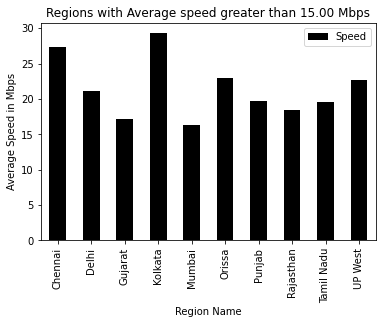

In [14]:
area.plot(x = "Area",y = "Speed",kind = "bar",
          xlabel="Region Name",ylabel = "Average Speed in Mbps",
          title="Regions with Average speed greater than 15.00 Mbps",
         colormap = "bone")

### Number of Airtel users in each region

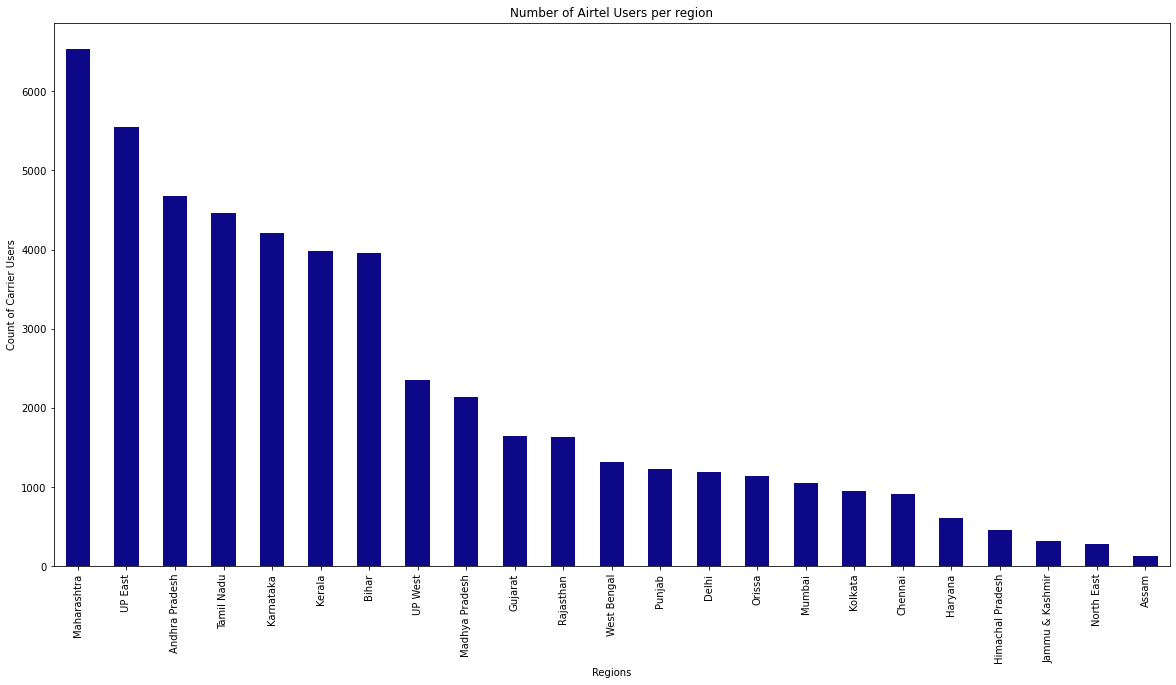

In [15]:

airtel_region = df[df["Carrier"]=="AIRTEL"].groupby("Area")["Area"].size().sort_values(ascending = False).plot(x = "Area",y = "Carrier",kind = "bar",xlabel = "Regions",
                         ylabel = "Count of Carrier Users",
                         title = "Number of Airtel Users per region",
                        colormap = "plasma",
                         figsize = (20,10))


### Total number of user for each carrier in every area

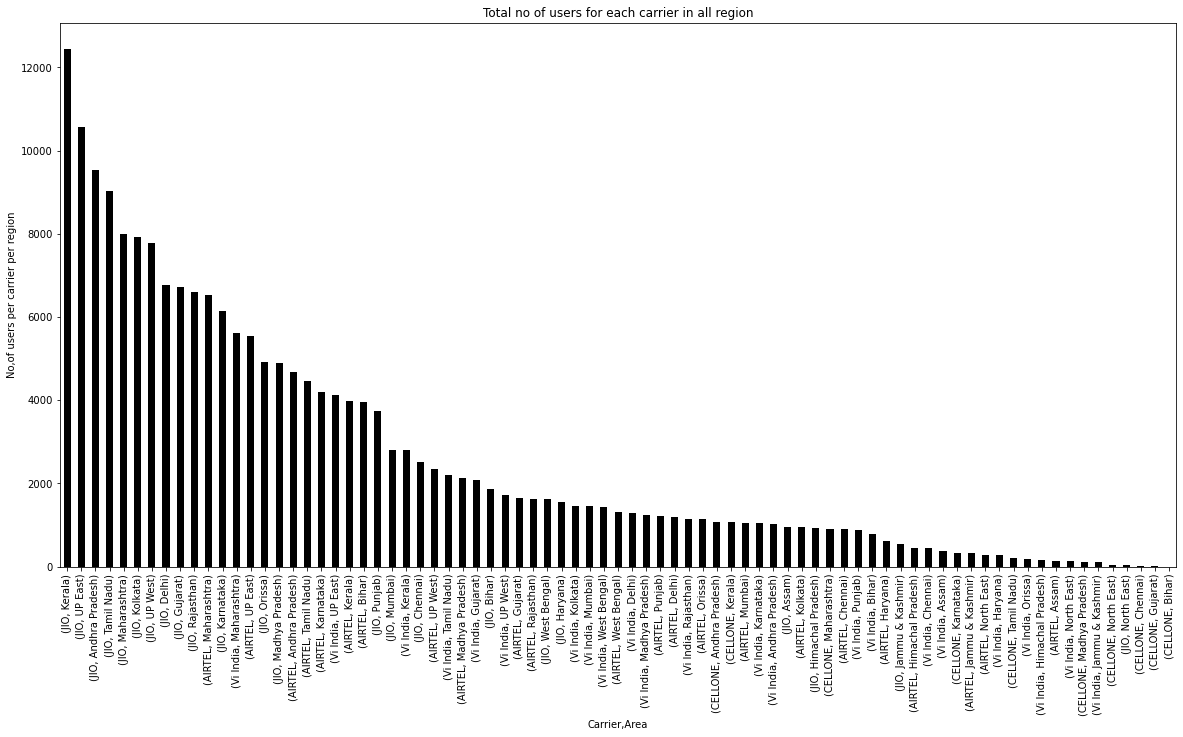

In [16]:
total_users_perregion = df.groupby(["Carrier","Area"])["Carrier"].size().sort_values(ascending=False).plot(kind = "bar",
                                                                              ylabel = "No,of users per carrier per region",
                                                                              title = "Total no of users for each carrier in all region",
                                                                              color = 'black',
                                                                              figsize = (20,10))


# Analysis on Signal Strength

## Area where Signal Strength is strongest on average

A signal strength is strongest when Decibles is closest to 0
Anything greater than -85 dBm is considered is Strongest
[Source](https://www.accu-tech.com/accu-insider/what-is-a-good-cell-phone-signal-strength)
![image](https://www.accu-tech.com/hs-fs/hubfs/wilson%20pro%20signal%20strength.jpeg?width=396&name=wilson%20pro%20signal%20strength.jpeg)

<AxesSubplot:ylabel='Area,Carrier'>

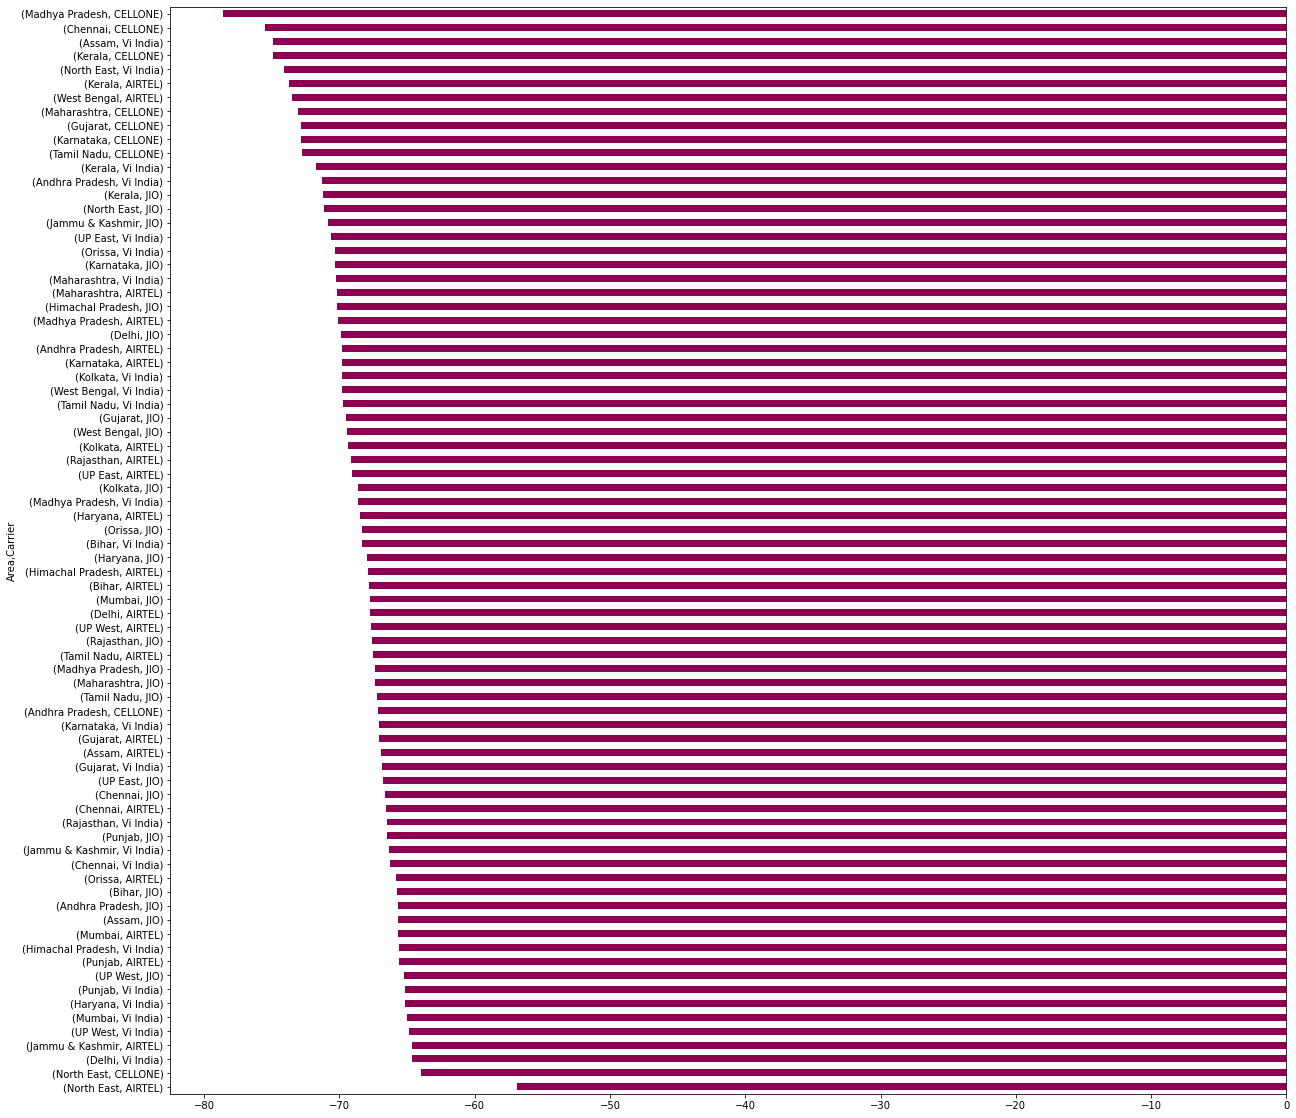

In [17]:
strong_area = df[df["dBm"] >= -85 ]
strong_area.groupby(["Area","Carrier"])["dBm"].mean().sort_values(ascending = False).plot(kind = "barh",
                                                                                          colormap = "PiYG",
                                                                                          figsize = (20,20))

In [18]:
strong_area.head()

,Carrier,Technology,Type,Speed,dBm,Area
0,JIO,4G,upload,0.056641,-73,Kerala
1,AIRTEL,4G,upload,0.243164,-71,Kerala
2,AIRTEL,4G,upload,4.384766,-69,Kerala
3,AIRTEL,4G,download,17.341797,-81,Kerala
4,AIRTEL,4G,download,14.263672,-81,Kerala


In [19]:
# Best Carrier in Mumbai (signal strength metric)
Mumbai = strong_area[strong_area["Area"]=="Mumbai"].groupby("Carrier",as_index = False)["dBm"].mean()
Mumbai

,Carrier,dBm
0,AIRTEL,-65.657534
1,JIO,-67.738636
2,Vi India,-65.031447


<AxesSubplot:title={'center':'Best Signal in Mumbai (Strength Metric)'}, xlabel='Carrier', ylabel='Average Signal Strength(dBm)'>

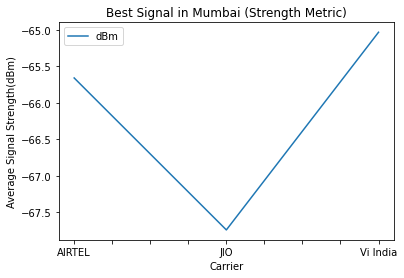

In [20]:
Mumbai.plot(x = "Carrier", ylabel = "Average Signal Strength(dBm)", title = "Best Signal in Mumbai (Strength Metric)" )

## Top Carriers in Jammu and Kasmir
![Jammu and Kasmir](https://gumlet.assettype.com/barandbench%2F2021-01%2Ff9ffa783-860a-46a7-95c5-c5ff51e22e80%2F4G_Kashmir.jpg?auto=format%2Ccompress&fit=max&format=webp&w=768&dpr=1.0)

In [21]:
J_KCarrier = df[df["Area"] == "Jammu & Kashmir"].groupby("Carrier").size().sort_values(ascending = False)

In [22]:
J_KCarrier.head()

Carrier
JIO         557
AIRTEL      317
Vi India    103
dtype: int64

Signal Strength on average in J&K

In [23]:
J_KStrength = df[df["Area"] == "Jammu & Kashmir"].groupby("Carrier")["dBm"].mean().sort_values(ascending = False)

In [24]:
J_KStrength

Carrier
Vi India   -78.174757
JIO        -83.565530
AIRTEL     -86.135647
Name: dBm, dtype: float64